# Machine Learning - Ex 1
---

Before anything, I will import libraries relevant to the assignments.

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data1 = np.loadtxt("./data/ex1data1.txt", delimiter=',')
df1 = pd.read_csv("./data/ex1data1.txt", sep=",", header=None)
data2 = np.loadtxt("./data/ex1data2.txt", delimiter=',')
df2 = pd.read_csv("./data/ex1data2.txt", sep=",", header=None)

Each problem will be named: "Problem 1,...,Problem n". Lets go!

## Problem 1: Warm up

- Create a 5x5 identity matrix

In [99]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## Problem 2: Computing Cost Linear Regression

### Problem 2.1: Plotting the data

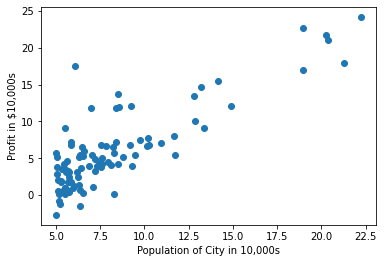

In [234]:
X = data1[:,0]
y = data1[:,1]

plt.figure()
plt.scatter(X,y) #using np
#plt.scatter(df1[0],df1[1]) #using pd
plt.ylabel("Profit in $10,000s")
plt.xlabel('Population of City in 10,000s')
plt.show()

### Problem 2.2: Gradient Descent

Objective of LR is to minimize cost function $J(ø)$ where the hypothesis $h_ø(x)$ is given by the linear model: $$h_ø(x)=ø_0+ø_1x_1+ø_2x_2+...+ø_nx_n = ø^Tx$$

First, we need to append $x_0=1$ vector to our vector X, create a thetha vector and set alpha and iterations. Set n (rows) and m (cols) for X train

In [181]:
m = len(X)
n = np.ndim(X)+1
X_train = np.column_stack((np.ones(m),X))
theta = np.zeros(n)
iters = 1500
alpha = 0.01

Now we can compute cost function $J(ø)$

In [182]:
def computeCost(X, y, theta):
    J = np.dot((np.dot(X,theta)-y),(np.dot(X,theta)-y))/(2*len(X))
    return J

Compute $J(ø)$ with theta = 0

In [183]:
print(computeCost(X_train, y, theta))

32.07273387745567


Compute $J(ø)$ with theta = (-1,2)

In [184]:
print(computeCost(X_train, y,[-1,2]))

54.24245508201236


Now, we have to minimize $ø_0$ and $ø_1$ simultaneously, to be able to min the cost function $J(ø)$

$$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}{(h_{\theta}(x^{(i)}) - y^{(i)}) x^{(i)}_j}$$

In [185]:
def gradientDescent(X, y, theta, alpha, iters):
    J_history=np.zeros(iters)
    for i in range(iters):
        theta = theta - np.dot((alpha/len(X)),np.dot((np.dot(X,theta)-y),X))
        J_history[i] = computeCost(X, y, theta)
    return theta, J_history

In [240]:
theta_opt, J_history = gradientDescent(X_train, y, theta, alpha, iters)
# print("theta computed gradient descent:\n%f,\n%f", theta_opt[0],theta_opt[1])
print("theta computed gradient descent:",(theta_opt))

theta computed gradient descent: [-3.63029144  1.16636235]


Now, lets plot this new theta_opt in the scatter plot with $ℎ_ø(𝑥)=ø_0+ø_1𝑥_1$

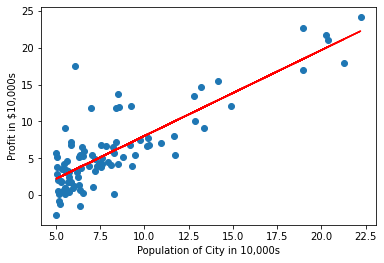

In [250]:
h = np.dot(X_train,theta_opt)
plt.figure()
plt.scatter(X,y)
plt.plot(X,h, color="red")
plt.ylabel("Profit in $10,000s")
plt.xlabel('Population of City in 10,000s')
plt.show()

We can also see the cost function * iterations plot, where cost function is minimized as iters get larger

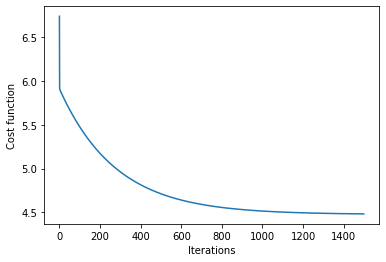

In [257]:
plt.figure()
plt.plot(range(iters), J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost function')
plt.show()

Now we can Predict values for population sizes of 35,000 and 70,000

In [263]:
X_35k=3.5
X_70k=7.0
h_35k = theta_opt[0]+np.dot(theta_opt[1],X_35k)
h_70k = theta_opt[0]+np.dot(theta_opt[1],X_70k)
print("For population 35k and 70k, we predict a profit of \n",h_35k,h_70k)

For population 35k and 70k, we predict a profit of 
 0.4519767867701767 4.534245012944714
